# Introduction to Quantum Computing
---

## All About Qubits

In [62]:
# ruff: noqa: T201, CPY001
import numpy as np

In [63]:
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])


def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.

    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.

    Returns:
        np.array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1
    norm = np.sqrt(np.abs(alpha) ** 2 + np.abs(beta) ** 2)

    # RETURN A VECTOR
    return np.array([alpha / norm, beta / norm])

In [64]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.

    Args:
        state_1 (np.array[complex]): A normalized quantum state vector
        state_2 (np.array[complex]): A second normalized quantum state vector

    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT

    return np.conjugate(state_1) @ state_2


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


In [65]:
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (np.array[complex]): A normalized qubit state vector.
        num_meas (int): The number of measurements to take

    Returns:
        np.array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES
    prob_of_zero, prob_of_one = np.abs(state) ** 2

    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES
    return np.random.choice([0, 1], p=[prob_of_zero, prob_of_one], size=num_meas)

In [66]:
normalized_state = normalize_state(0.2, 0.5)
print(normalized_state)
print(measure_state(normalized_state, 30))

[0.37139068 0.92847669]
[1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


In [67]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (np.array[complex]): A normalized quantum state vector.

    Returns:
        np.array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    return U @ state


In [68]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE |0>
    return np.array([1, 0])


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    state_to_measure = apply_u(initialize_state())

    return measure_state(state_to_measure, 100)


## Quantum Circuits

In [10]:
import pennylane as qml


def my_circuit(theta, phi):
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)
    qml.RX(theta, wires=2)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])


In [70]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)

    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])

    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


array([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
       2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03])

In [71]:
dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################


# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE
@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
# YOUR CODE HERE #
##################

# RUN THE QNODE WITH THE PROVIDED PARAMETERS
my_circuit(theta, phi, omega)


array([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
       2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03])

In [72]:
##################
# YOUR CODE HERE #
##################

# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4

## Unitary Matrices

In [73]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def apply_u():
    ##################
    # YOUR CODE HERE #
    ##################

    # USE QubitUnitary TO APPLY U TO THE QUBIT
    qml.QubitUnitary(U, wires=0)

    # Return the state
    return qml.state()


In [74]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS

    # RETURN THE QUANTUM STATE VECTOR
    qml.Rot(phi, theta, omega, wires=0)

    return qml.state()

# Single Qubit Gates
---

## X and H

In [75]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


def prepare_state_zero_or_one(state):
    """Prepares a qubit in the specified state.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Raises:
        ValueError: If the state is not 0 or 1.
    """
    if state not in [0, 1]:
        raise ValueError("State must be either 0 or 1, to initially prepare |0> or |1> respectively")

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER
    if state:
        qml.X(0)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    prepare_state_zero_or_one(state)

    # APPLY U TO THE STATE
    qml.QubitUnitary(U, wires=0)

    return qml.state()

In [76]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE HADAMARD GATE
    qml.H(0)

    # RETURN THE STATE
    return qml.state()


In [77]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state
    prepare_state_zero_or_one(state)

    # APPLY THE HADAMARD
    qml.H(0)

    # RETURN THE STATE
    return qml.state()


print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))

[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


In [78]:
##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)


# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE
@qml.qnode(dev)
def apply_hxh(state):
    prepare_state_zero_or_one(state)
    qml.H(0)
    qml.X(0)
    qml.H(0)
    return qml.state()


# Print your results
print(apply_hxh(0))
print(apply_hxh(1))

[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


## It's Just a Phase

In [79]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.H(0)

    # APPLY PAULI Z
    qml.Z(0)

    # RETURN THE STATE
    return qml.state()


print(apply_z_to_plus())


[ 0.70710678+0.j -0.70710678+0.j]


In [80]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.H(0)

    # APPLY RZ
    qml.RZ(np.pi, wires=0)

    # RETURN THE STATE
    return qml.state()

In [81]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT
    qml.H(0)
    qml.S(0)
    qml.adjoint(qml.T)(wires=0)
    qml.RZ(0.3, 0)
    qml.adjoint(qml.S)(wires=0)

    # RETURN THE STATE

    return qml.state()

## From a Different Angle

In [82]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi, 0)

    return qml.state()


print(apply_rx_pi(0))
print(apply_rx_pi(1))


[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


In [83]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(theta, 0)

    # APPLY RX(theta) AND RETURN THE STATE

    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

# plot = plotter(angles, output_states)

In [84]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RY(theta) AND RETURN THE STATE
    qml.RY(theta, 0)

    return qml.state()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

# plot = plotter(angles, output_states)

## Universal Set Gates

In [85]:
dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi / 2, np.pi / 2, np.pi / 2


@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()

In [86]:
# from qiskit.circuit import equivalence_library

# equivalence_library.StandardEquivalenceLibrary.draw()

In [87]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def convert_to_rz_rx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX
    # H:
    qml.RZ(np.pi / 2, wires=0)
    qml.RX(np.pi / 2, wires=0)
    qml.RZ(np.pi / 2, wires=0)

    qml.RZ(np.pi / 2, 0)  # S
    qml.RZ(-np.pi / 4, 0)  # T

    # RY:
    qml.RZ(-np.pi / 2, 0)
    qml.RX(np.pi, 0)
    qml.RZ(np.pi / 2, 0)

    return qml.state()


# NOW MERGING ALL THE CONSECUTIVE SAME GATES:


@qml.qnode(dev)
def convert_to_rz_rx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX
    qml.RZ(np.pi / 2, wires=0)
    qml.RX(np.pi / 2, wires=0)
    qml.RZ(np.pi / 4, 0)
    qml.RX(np.pi, wires=0)
    qml.RZ(np.pi / 2, 0)

    return qml.state()

In [88]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def unitary_with_h_and_t():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY ONLY H AND T TO PRODUCE A CIRCUIT THAT EFFECTS THE GIVEN MATRIX
    qml.H(0)
    qml.T(0)
    qml.H(0)
    qml.T(0)
    qml.T(0)
    qml.H(0)

    return qml.state()


## Prepare Yourself

In [89]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.H(0)
    qml.T(0)
    qml.T(0)
    qml.T(0)
    qml.T(0)
    qml.T(0)

    return qml.state()


In [90]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.RX(np.pi / 3, 0)

    return qml.state()


print(prepare_state())

[0.8660254+0.j  0.       -0.5j]


In [91]:
v = np.array([0.52889389 - 0.14956775j, 0.67262317 + 0.49545818j])

##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)


# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE


@qml.qnode(dev)
def prepare_state(state=v):
    qml.StatePrep(state, wires=0)

    return qml.state()


# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, level="device")(v))

[0.52889389-0.14956775j 0.67262317+0.49545818j]

0: ──|Ψ⟩─┤  State


## Measurements

In [92]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        np.array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY HADAMARD AND MEASURE
    qml.Hadamard(wires=0)
    return qml.probs(wires=[0])


print(apply_h_and_measure(0))
print(apply_h_and_measure(1))


[0.5 0.5]
[0.5 0.5]


In [93]:
##################
# YOUR CODE HERE #
##################


# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    qml.RX(2 * np.pi / 3, 0)
    qml.Z(0)


# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.S(wires=0)


In [94]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def measure_in_y_basis():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE
    prepare_psi()

    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    qml.adjoint(y_basis_rotation)()

    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES
    return qml.probs(wires=[0])


print(measure_in_y_basis())


[0.9330127 0.0669873]


## What Did you Expect?

In [95]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
    qml.RX(np.pi / 4, 0)
    qml.H(0)
    qml.Z(0)

    return qml.expval(qml.PauliY(0))


print(circuit())

-0.7071067811865471


In [96]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values:
    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT
    dev = qml.device("default.qubit", wires=1, shots=shots)

    @qml.qnode(dev)
    def circuit():
        ##################
        # YOUR CODE HERE #
        ##################

        # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
        qml.RX(np.pi / 4, 0)
        qml.H(0)
        qml.Z(0)

        return qml.expval(qml.PauliY(0))

    # STORE RESULT IN SHOT_RESULTS ARRAY
    shot_results.append(circuit())

print(qml.math.unwrap(shot_results))

[-0.68, -0.738, -0.685, -0.70712, -0.709272]


In [97]:
dev = qml.device("default.qubit", wires=1, shots=100000)


@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # RETURN THE MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE

    return qml.sample(qml.PauliY(0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1.

    Args:
        samples (np.array[float]): 100000 samples representing the results of
            running the above circuit.

    Returns:
        float: the expectation value computed based on samples.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # USE THE SAMPLES TO ESTIMATE THE EXPECTATION VALUE
    return np.mean(samples)


samples = circuit()
print(samples)
print(compute_expval_from_samples(samples))

[-1. -1. -1. ... -1.  1.  1.]
-0.70902


In [98]:
def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we obtain running the
        circuit 100 times with n_shots shots each.
    """
    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE WITH GIVEN NUMBER OF SHOTS
    dev = qml.device("default.qubit", wires=1, shots=n_shots)

    # DECORATE THE CIRCUIT BELOW TO CREATE A QNODE
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS
    results = [circuit() for _ in range(n_trials)]
    return np.var(results)


def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.

    Args:
        n_shots (int): The number of shots

    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # ESTIMATE THE VARIANCE BASED ON SHOT NUMBER
    if n_shots == 0:
        return None

    return 1 / n_shots


# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
# plot = plotter(shot_vals, results_experiment, results_scaling)

# Circuits with Many Qubits
---

## Multi-Qubit Systems

In [99]:
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.

    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The computational basis state |basis_id>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE BASIS STATE
    qml.BasisState(basis_id, wires=[0, 1, 2])

    return qml.state()


basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")

Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [100]:
# Creates a device with *two* qubits
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)

    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT

    return qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(1))


print(two_qubit_circuit())

(array(0.), array(-1.))


In [101]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def create_one_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |1>|->
    qml.PauliX(wires=0)
    qml.Hadamard(wires=1)
    qml.Z(wires=1)

    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X
    return qml.expval(qml.PauliZ(0) @ qml.PauliX(1))


print(create_one_minus())

0.9999999999999996


In [102]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(theta, wires=0)
    qml.RY(2 * theta, 1)

    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.

    Args:
        theta (float): a rotation angle.

    Returns:
        float: The expectation value of the observable Z Z
    """

    ##################
    # YOUR CODE HERE #
    ##################
    qml.RX(theta, wires=0)
    qml.RY(2 * theta, 1)

    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))


def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (np.array[float]): Results from the expectation value of
            ZI in circuit_1.
        IZ_results (np.array[float]): Results from the expectation value of
            IZ in circuit_2.

    Returns:
        np.array[float]: A combination of ZI_results and IZ_results that
        produces results equivalent to measuring ZZ.
    """
    combined_results = np.zeros(len(ZI_results))

    ##################
    # YOUR CODE HERE #
    ##################
    combined_results = ZI_results * IZ_results

    return combined_results


theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
# plot = plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results)

## All Tied Up

In [103]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        np.array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    # OLD: qml.BasisStatePreparation(bits, wires=[0, 1])
    qml.BasisState(basis_id, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE CNOT
    qml.CNOT(wires=[0, 1])

    return qml.state()


##################
# YOUR CODE HERE #
##################

# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {"00": "00", "01": "01", "10": "11", "11": "10"}


# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(0))

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [104]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def apply_h_cnot():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])

    return qml.state()


print(apply_h_cnot())

##################
# YOUR CODE HERE #
##################

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [105]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    """Implement the circuit above and return measurement outcome probabilities.

    Args:
        theta (float): A rotation angle
        phi (float): A rotation angle
        omega (float): A rotation angle

    Returns:
        np.array[float]: Measurement outcome probabilities of the 3-qubit
        computational basis states.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT AND RETURN MEASUREMENT PROBABILITIES
    qml.Hadamard(wires=0)
    qml.CRX(theta, wires=[0, 1])
    qml.CRY(phi, wires=[1, 2])
    qml.CRZ(omega, wires=[2, 0])

    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))

[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]


## We've got it Under Control

In [106]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


def prepare_states(phi, theta, omega):
    qml.U3(phi, theta, omega, wires=0)


@qml.qnode(device=dev)
def true_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR CZ GATE HERE
    qml.CZ(wires=[0, 1])

    return qml.state()


@qml.qnode(dev)
def imposter_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT CZ USING ONLY H AND CNOT
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=1)

    return qml.state()


print(f"True CZ output state {true_cz(phi, theta, omega)}")
print(f"Imposter CZ output state {imposter_cz(phi, theta, omega)}")

True CZ output state [ 0.82533561+0.j          0.        +0.j         -0.37620774+0.42105684j
  0.        +0.j        ]
Imposter CZ output state [ 0.82533561+0.j          0.        +0.j         -0.37620774+0.42105684j
  0.        +0.j        ]


In [107]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR SWAP GATE HERE
    qml.SWAP(wires=[0, 1])

    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE SWAP GATE USING A SEQUENCE OF CNOTS
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 0])
    qml.CNOT(wires=[0, 1])

    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")

Regular SWAP state = [ 0.82533561+0.j         -0.37620774+0.42105684j  0.        +0.j
  0.        +0.j        ]
CNOT SWAP state = [ 0.82533561+0.j         -0.37620774+0.42105684j  0.        +0.j
  0.        +0.j        ]


In [108]:
dev = qml.device("default.qubit", wires=3)

# Prepare first qubit in |1>, and arbitrary states on the second two qubits
phi, theta, omega = 1.2, 2.3, 3.4


# A helper function just so you can visualize the initial state
# before the controlled SWAP occurs.
@qml.qnode(dev)
def no_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)
    return qml.state()


@qml.qnode(dev)
def controlled_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # PERFORM A CONTROLLED SWAP USING A SEQUENCE OF TOFFOLIS
    qml.Toffoli(wires=[0, 1, 2])
    qml.Toffoli(wires=[0, 2, 1])
    qml.Toffoli(wires=[0, 1, 2])

    return qml.state()


print(no_swap(phi, theta, omega))
print(controlled_swap(phi, theta, omega))

[ 0.82533561+0.j          0.        +0.j          0.        +0.j
  0.        +0.j         -0.37620774+0.42105684j  0.        +0.j
  0.        +0.j          0.        +0.j        ]
[ 0.82533561+0.j          0.        +0.j          0.        +0.j
  0.        +0.j         -0.37620774+0.42105684j  0.        +0.j
  0.        +0.j          0.        +0.j        ]


In [109]:
dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def four_qubit_mcx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT ABOVE USING A 4-QUBIT MULTI-CONTROLLED X
    qml.H(0)
    qml.H(1)
    qml.H(2)
    qml.MultiControlledX(control_wires=[0, 1, 2], wires=3, control_values="001")

    return qml.state()


print(four_qubit_mcx())


[0.35355339+0.j 0.        +0.j 0.        +0.j 0.35355339+0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j]


/Users/guillermoabadlopez/Documents/QMaster/2nd Year/QComputing/.venv/lib/python3.12/site-packages/pennylane/ops/op_math/controlled_ops.py:1171: PennyLaneDeprecationWarning: Specifying control values using a bitstring is deprecated, and will not be supported in future releases, Use a list of booleans or integers instead.
  warnings.warn(
/Users/guillermoabadlopez/Documents/QMaster/2nd Year/QComputing/.venv/lib/python3.12/site-packages/pennylane/ops/op_math/controlled_ops.py:1177: UserWarning: The control_wires keyword for MultiControlledX is deprecated, and will be removed soon. Use wires = (*control_wires, target_wire) instead.
  warnings.warn(


In [110]:
# Wires 0, 1, 2 are the control qubits
# Wire 3 is the auxiliary qubit
# Wire 4 is the target
dev = qml.device("default.qubit", wires=5)


@qml.qnode(dev)
def four_qubit_mcx_only_tofs():
    # We will initialize the control qubits in state |1> so you can see
    # how the output state gets changed.
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT A 3-CONTROLLED NOT WITH TOFFOLIS
    qml.Toffoli(wires=[0, 1, 3])
    qml.Toffoli(wires=[2, 3, 4])
    qml.Toffoli(wires=[0, 1, 3])

    return qml.state()


print(four_qubit_mcx_only_tofs())

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j
 0.+0.j 0.+0.j]


## Multi Qubit Gate Challenge

In [111]:
dev = qml.device("default.qubit", wires=2)

# Starting from the state |00>, implement a PennyLane circuit
# to construct each of the Bell basis states.


@qml.qnode(dev)
def prepare_psi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> + |11>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])

    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> - |11>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliZ(wires=1)

    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> + |10>)
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)
    qml.CNOT(wires=[0, 1])

    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> - |10>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliZ(wires=1)
    qml.PauliX(wires=1)

    return qml.state()


psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
print(f"|ψ_+> = {psi_plus}")
print(f"|ψ_-> = {psi_minus}")
print(f"|ϕ_+> = {phi_plus}")
print(f"|ϕ_-> = {phi_minus}")


|ψ_+> = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
|ψ_-> = [ 0.70710678+0.j -0.        +0.j  0.        +0.j -0.70710678+0.j]
|ϕ_+> = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
|ϕ_-> = [-0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


In [112]:
dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [1, 1]


@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1)

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE MULTIPLEXER
    # IF STATE OF FIRST TWO QUBITS IS 01, APPLY X TO THIRD QUBIT
    qml.CNOT(wires=[1, 2])

    # IF STATE OF FIRST TWO QUBITS IS 10, APPLY Z TO THIRD QUBIT
    qml.CZ(wires=[0, 2])

    # IF STATE OF FIRST TWO QUBITS IS 11, APPLY Y TO THIRD QUBIT
    qml.ControlledQubitUnitary([[-1j, 0], [0, -1j]], wires=2, control_wires=[0, 1])

    return qml.state()


print(apply_control_sequence(state))


[0.+0.j         0.+0.j         0.+0.j         0.+0.j
 0.+0.j         0.+0.j         0.+0.70710678j 0.+0.70710678j]


# Challenges for Badges:
---

In [113]:
np.random.seed(1967)


def get_matrix(params):
    """
    Args:
        - params (array): The four parameters of the model.

    Returns:
        - (matrix): The associated matrix to these parameters.
    """

    alpha, beta, gamma, phi = params

    # Put your code here #
    matrix = (
        np.array([[1, 0], [0, np.exp(1j * alpha)]])
        @ np.array([[np.cos(beta), -np.sin(beta)], [np.sin(beta), np.cos(beta)]])
        @ np.array([[1, 0], [0, np.exp(1j * gamma)]])
        @ np.array([[np.exp(1j * phi), 0], [0, np.exp(1j * phi)]])
    )

    # Return the matrix
    return matrix

In [114]:
def error(U, params):
    """
    This function determines the similarity between your generated matrix and
    the target unitary.

    Args:
         - U (np.array): Goal matrix that we want to approach.
         - params (array): The four parameters of the model.

    Returns:
         - (float): Error associated with the quality of the solution.
    """
    matrix = get_matrix(params)
    identity_error = np.linalg.inv(matrix) @ U

    # Return the error
    return np.abs(2 - identity_error[0][0] - identity_error[1][1])

# Basic Quantum Algorithms
---


## No exponential Magic

In [115]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)


@qml.qnode(dev)
def naive_circuit():
    """Create a uniform superposition and return the probabilities.

    Returns:
        array[float]: Probabilities for observing different outcomes.
    """
    for wire in range(n_bits):
        ##################
        # YOUR CODE HERE #
        ##################
        qml.H(wire)

    return qml.probs(wires=range(n_bits))

## The Magic 8-Ball:

In [116]:
def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2] * len(combo))  # Index of solution
    my_array = np.identity(2 ** len(combo))  # Create the identity matrix

    ##################
    # YOUR CODE HERE #
    ##################

    # MODIFY DIAGONAL ENTRY CORRESPONDING TO SOLUTION INDEX
    my_array[index, index] = -1

    return my_array

In [117]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)


@qml.qnode(dev)
def oracle_circuit(combo):
    """Create a uniform superposition, apply the oracle, and return probabilities.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: The output probabilities.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
        qml.H(i)

    qml.QubitUnitary(oracle_matrix(combo), range(n_bits))

    return qml.probs(wires=range(n_bits))

## Pair Programming:

In [118]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)


@qml.qnode(dev)
def pair_circuit(x_tilde, combo):
    """Test a pair labelled by x_tilde for the presence of a solution.

    Args:
        x_tilde (list[int]): An (n_bits - 1)-string labelling the pair to test.
        combo (list[int]): A secret combination of n_bits 0s and 1s.

    Returns:
        array[float]: Probabilities on the last qubit.
    """
    for i in range(n_bits - 1):  # Initialize x_tilde part of state
        if x_tilde[i] == 1:
            qml.PauliX(wires=i)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.H(n_bits - 1)
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
    qml.H(n_bits - 1)

    return qml.probs(wires=n_bits - 1)

In [119]:
def pair_lock_picker(trials):
    """Create a combo, run pair_circuit until it succeeds, and tally success rate.

    Args:
        trials (int): Number of times to test the lock picker.

    Returns:
        float: The average number of times the lock picker uses pair_circuit.
    """
    x_tilde_strs = [np.binary_repr(n, n_bits - 1) for n in range(2 ** (n_bits - 1))]
    x_tildes = [[int(s) for s in x_tilde_str] for x_tilde_str in x_tilde_strs]

    test_numbers = []

    for _ in range(trials):
        # combo = secret_combo(n_bits)  # Random list of bits
        combo = np.random.randint(2, size=n_bits)
        counter = 0
        for x_tilde in x_tildes:
            counter += 1

            ##################
            # YOUR CODE HERE #
            ##################
            circuit = pair_circuit(x_tilde, combo)
            if np.isclose(circuit[1], 1):
                break

        test_numbers.append(counter)
    return sum(test_numbers) / trials


trials = 500
output = pair_lock_picker(trials)

print(f"For {n_bits} bits, it takes", output, "pair tests on average.")

For 4 bits, it takes 4.428 pair tests on average.


## Making and Breaking Promises:

In [120]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)


def multisol_oracle_matrix(combos):
    """Return the oracle matrix for a set of solutions.

    Args:
        combos (list[list[int]]): A list of secret bit strings.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    indices = [np.ravel_multi_index(combo, [2] * len(combo)) for combo in combos]
    ##################
    # YOUR CODE HERE #
    ##################

    my_array = np.identity(2 ** len(combos[0]))  # Create the identity matrix
    for index in indices:
        my_array[index, index] = -1

    return my_array


@qml.qnode(dev)
def multisol_pair_circuit(x_tilde, combos):
    """Implements the circuit for testing a pair of combinations labelled by x_tilde.

    Args:
        x_tilde (list[int]): An (n_bits - 1)-bit string labelling the pair to test.
        combos (list[list[int]]): A list of secret bit strings.

    Returns:
        array[float]: Probabilities on the last qubit.
    """
    for i in range(n_bits - 1):  # Initialize x_tilde part of state
        if x_tilde[i] == 1:
            qml.PauliX(wires=i)

    ##################
    # YOUR CODE HERE #
    ##################

    qml.H(n_bits - 1)
    qml.QubitUnitary(multisol_oracle_matrix(combos), wires=range(n_bits))
    qml.H(n_bits - 1)

    return qml.probs(wires=n_bits - 1)

In [121]:
def parity_checker(combos):
    """Use multisol_pair_circuit to determine the parity of a solution set.

    Args:
        combos (list[list[int]]): A list of secret combinations.

    Returns:
        int: The parity of the solution set.
    """
    parity = 0
    x_tilde_strs = [np.binary_repr(n, n_bits - 1) for n in range(2 ** (n_bits - 1))]
    x_tildes = [[int(s) for s in x_tilde_str] for x_tilde_str in x_tilde_strs]
    for x_tilde in x_tildes:
        ##################
        # YOUR CODE HERE #
        ##################

        # IMPLEMENT PARITY COUNTING ALGORITHM
        circuit = multisol_pair_circuit(x_tilde, combos)
        if np.isclose(circuit[1], 1):
            parity += 1

    return parity % 2

## Hadamard Transform

In [122]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)


@qml.qnode(dev)
def hoh_circuit(combo):
    """A circuit which applies Hadamard-oracle-Hadamard and returns probabilities.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: Measurement outcome probabilities.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    [qml.Hadamard(wire) for wire in range(n_bits)]
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
    [qml.Hadamard(wire) for wire in range(n_bits)]

    return qml.probs(wires=range(n_bits))

## Deutsch–Jozsa

In [123]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)


@qml.qnode(dev)
def multisol_hoh_circuit(combos):
    """A circuit which applies Hadamard, multi-solution oracle, then Hadamard.

    Args:
        combos (list[list[int]]): A list of secret bit strings.

    Returns:
        array[float]: Probabilities for observing different outcomes.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    [qml.Hadamard(wire) for wire in range(n_bits)]
    qml.QubitUnitary(multisol_oracle_matrix(combos), wires=range(n_bits))
    [qml.Hadamard(wire) for wire in range(n_bits)]

    return qml.probs(wires=range(n_bits))


In [124]:
def deutsch_jozsa(promise_var):
    """Implement the Deutsch-Jozsa algorithm and guess the promise variable.

    Args:
        promise_var (int): Indicates whether the function is balanced (0) or constant (1).

    Returns:
        int: A guess at the promise variable.
    """
    if promise_var == 0:
        how_many = 2 ** (n_bits - 1)
    else:
        how_many = np.random.choice([0, 2**n_bits])  # Choose all or nothing randomly
    # combos = multisol_combo(n_bits, how_many)  # Generate random combinations
    combos = [np.random.randint(2, size=n_bits) for _ in range(how_many)]

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT DEUTSCH-JOZSA ALGORITHM
    circuit = multisol_hoh_circuit(combos)
    return 1 if np.isclose(circuit[0], 1) else 0

# Quantum Fourier Transform:
---
## Changing Perspectives

In [125]:
import numpy as np


def coefficients_to_values(coefficients):
    """Returns the value representation of a polynomial

    Args:
        coefficients (array[complex]): a 1-D array of complex
            coefficients of a polynomial with
            index i representing the i-th degree coefficient

    Returns:
        array[complex]: the value representation of the
            polynomial
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # # My own version:
    # n = len(coefficients)
    # w = np.exp(2*np.pi*1.j/n)

    # return np.array([np.sum([coefficients[k]*w**(k*i) for k in range(n)]) for i in range(n)])

    return np.fft.fft(coefficients)


A = [4, 3, 2, 1]
print(coefficients_to_values(A))

[10.+0.j  2.-2.j  2.+0.j  2.+2.j]


In [126]:
def values_to_coefficients(values):
    """Returns the coefficient representation of a polynomial

    Args:
        values (array[complex]): a 1-D complex array with
            the value representation of a polynomial

    Returns:
        array[complex]: a 1-D complex array of coefficients
    """

    ##################
    # YOUR CODE HERE #
    ##################
    return np.fft.ifft(values)


A = [10.0 + 0.0j, 2.0 - 2.0j, 2.0 + 0.0j, 2.0 + 2.0j]
print(values_to_coefficients(A))

[4.+0.j 3.+0.j 2.+0.j 1.+0.j]


In [127]:
def nearest_power_of_2(x):
    """Given an integer, return the nearest power of 2 (strictly greater).

    Args:
        x (int): a positive integer

    Returns:
        int: the nearest power of 2 of x
    """
    ##################
    # YOUR CODE HERE #
    ##################

    return 2 ** (x - 1).bit_length()

In [128]:
def fft_multiplication(poly_a, poly_b):
    """Returns the result of multiplying two polynomials

    Args:
        poly_a (array[complex]): 1-D array of coefficients
        poly_b (array[complex]): 1-D array of coefficients

    Returns:
        array[complex]: complex coefficients of the product
            of the polynomials
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # Calculate the number of values required
    n = len(poly_a) + len(poly_b) - 1

    # Figure out the nearest power of 2
    pow_2 = nearest_power_of_2(n)

    # Pad zeros to the polynomial
    poly_a = np.pad(poly_a, (0, pow_2 - len(poly_a)), "constant")
    poly_b = np.pad(poly_b, (0, pow_2 - len(poly_b)), "constant")

    # Convert the polynomials to value representation
    poly_a_values = coefficients_to_values(poly_a)
    poly_b_values = coefficients_to_values(poly_b)

    # Multiply
    result_prod = poly_a_values * poly_b_values

    # Convert back to coefficient representation
    return values_to_coefficients(result_prod)

## Quantum Fourier Transform

In [129]:
import pennylane as qml

num_wires = 1
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def one_qubit_QFT(basis_id):
    """A circuit that computes the QFT on a single qubit.

    Args:
        basis_id (int): An integer value identifying
            the basis state to construct.

    Returns:
        array[complex]: The state of the qubit after applying QFT.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0])

    ##################
    # YOUR CODE HERE #
    ##################
    # Apply the Hadamard gate
    qml.Hadamard(wires=0)

    return qml.state()

In [130]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def two_qubit_QFT(basis_id):
    """A circuit that computes the QFT on two qubits using qml.QubitUnitary.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        array[complex]: The state of the qubits after the QFT operation.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################
    # Define the QFT matrix for 2 qubits
    QFT_matrix = (1 / 2) * np.array([[1, 1, 1, 1], [1, 1j, -1, -1j], [1, -1, 1, -1], [1, -1j, -1, 1j]])

    # Apply the QFT using QubitUnitary
    qml.QubitUnitary(QFT_matrix, wires=[0, 1])

    return qml.state()

In [131]:
num_wires = 2
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def decompose_two_qubit_QFT(basis_id):
    """A circuit that computes the QFT on two qubits using elementary gates.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        array[complex]: The state of the qubits after the QFT operation.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################

    # Apply the Hadamard gate to the first qubit
    qml.Hadamard(wires=0)

    # Apply the controlled phase shift gate
    qml.ControlledPhaseShift(np.pi / 2, wires=[0, 1])

    # Apply the Hadamard gate to the second qubit
    qml.Hadamard(wires=1)

    # Swap the qubits
    qml.SWAP(wires=[0, 1])

    return qml.state()

## Connecting the dots:

In [132]:
num_wires = 3
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev)
def three_qubit_QFT(basis_id):
    """A circuit that computes the QFT on three qubits.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.

    Returns:
        array[complex]: The state of the qubits after the QFT operation.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=num_wires)]
    qml.BasisState(bits, wires=[0, 1, 2])

    ##################
    # YOUR CODE HERE #
    ##################

    # Apply the Hadamard gate to the first qubit
    qml.Hadamard(wires=0)
    # Apply controlled phase shift gates
    qml.ControlledPhaseShift(np.pi / 2, wires=[0, 1])
    qml.ControlledPhaseShift(np.pi / 4, wires=[0, 2])

    # Apply the Hadamard gate to the second qubit
    qml.Hadamard(wires=1)
    # Apply controlled phase shift gate
    qml.ControlledPhaseShift(np.pi / 2, wires=[1, 2])

    # Apply the Hadamard gate to the third qubit
    qml.Hadamard(wires=2)

    # Swap the qubits
    qml.SWAP(wires=[0, 2])

    return qml.state()

In [133]:
dev = qml.device("default.qubit", wires=4)


def swap_bits(n_qubits):
    """A circuit that reverses the order of qubits, i.e.,
    performs a SWAP such that [q1, q2, ..., qn] -> [qn, ... q2, q1].

    Args:
        n_qubits (int): An integer value identifying the number of qubits.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_qubits // 2):
        qml.SWAP(wires=[i, n_qubits - i - 1])


@qml.qnode(dev)
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))
    # qft_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()

In [134]:
dev = qml.device("default.qubit", wires=4)


def qft_rotations(n_qubits):
    """A circuit performs the QFT rotations on the specified qubits.

    Args:
        n_qubits (int): An integer value identifying the number of qubits.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_qubits):
        qml.Hadamard(wires=i)
        for j in range(i + 1, n_qubits):
            qml.ControlledPhaseShift(np.pi / 2 ** (j - i), wires=[i, j])


@qml.qnode(dev)
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))
    qft_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()

In [135]:
dev = qml.device("default.qubit", wires=4)


def qft_recursive_rotations(n_qubits, wire=0):
    """A circuit that performs the QFT rotations on the specified qubits
        recursively.

    Args:
        n_qubits (int): An integer value identifying the number of qubits.
        wire (int): An integer identifying the wire
                    (or the qubit) to apply rotations on.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    if n_qubits == 0:
        return

    qml.Hadamard(wires=wire)

    for i in range(wire + 1, n_qubits):
        qml.ControlledPhaseShift(np.pi / 2 ** (i - wire), wires=[wire, i])

    qft_recursive_rotations(n_qubits - 1, wire + 1)


@qml.qnode(dev)
def qft_node(basis_id, n_qubits):
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))
    qft_recursive_rotations(n_qubits)
    swap_bits(n_qubits)
    return qml.state()

In [136]:
dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def pennylane_qft(basis_id, n_qubits):
    """A that circuit performs the QFT using PennyLane's QFT template.

    Args:
        basis_id (int): An integer value identifying
            the basis state to construct.
        n_qubits (int): An integer identifying the
            number of qubits.

    Returns:
        array[complex]: The state after applying the QFT to the qubits.
    """
    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=n_qubits)]
    qml.BasisState(bits, wires=range(n_qubits))

    ##################
    # YOUR CODE HERE #
    ##################
    qml.QFT(wires=range(n_qubits))

    return qml.state()

# Quantum Phase Estimation
---
## Catch the Phase

In [137]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def guess_the_unitary(unitary):
    """Given a unitary that performs a Z or a -Z operation
    on a qubit, guess which one it is.

    Args:
        U (array[complex]): A unitary matrix, guaranteed to be either Z or -Z.

    Returns:
        array [int]:  Probabilities on  on the first qubit
        using qml.probs()
    """
    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    qml.ControlledQubitUnitary(unitary, control_wires=0, wires=1)
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)


# Z gate
U = qml.PauliZ.compute_matrix()

# -Z gate
# U = (-1)*qml.PauliZ.compute_matrix()

print(guess_the_unitary(U))


[1. 0.]


In [139]:
dev = qml.device("default.qubit", wires=2)


@qml.qnode(dev)
def phase_kickback_X(eigenvector):
    """Given an eigenvector of X,
    apply the phase kickback circuit to observe
    the probabilities on the control wire

    Args:
        eigenvector(String): A string "plus" or "minus" depicting
        the eigenvector of X

    Returns:
        array[int]: Measurement outcome on the first qubit using qml.probs()
    """
    # Prepare |ψ>
    ##################
    # YOUR CODE HERE #
    ##################
    if eigenvector == "plus":
        qml.Hadamard(wires=1)
    elif eigenvector == "minus":
        qml.Hadamard(wires=1)
        qml.PauliZ(wires=1)

    # Phase kickback
    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.Hadamard(wires=0)

    return qml.probs(wires=[0])


print(phase_kickback_X("plus"))
print(phase_kickback_X("minus"))

# MODIFY EIGENVALUES BELOW
eigenvalue_of_X_plus = 1
eigenvalue_of_X_minus = -1

[1. 0.]
[0. 1.]


## It's not Just a Phase

In [141]:
def U_power_2k(unitary, k):
    """Computes U at a power of 2k (U^2^k)

    Args:
        unitary (array[complex]): A unitary matrix

    Returns:
        array[complex]: the unitary raised to the power of 2^k
    """
    ##################
    # YOUR CODE HERE #
    ##################
    return np.linalg.matrix_power(unitary, 2**k)


# Try out a higher power of U
U = qml.T.compute_matrix()
print(U)

U_power_2k(U, 2)


[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]


array([[ 1.+0.0000000e+00j,  0.+0.0000000e+00j],
       [ 0.+0.0000000e+00j, -1.+4.4408921e-16j]])

In [142]:
estimation_wires = [0, 1, 2]
target_wires = [3]


def apply_controlled_powers_of_U(unitary):
    """A quantum function that applies the sequence of powers of U^2^k to
    the estimation wires.

    Args:
        unitary (array [complex]): A unitary matrix
    """
    ##################
    # YOUR CODE HERE #
    ##################
    for k, control_wire in enumerate(reversed(estimation_wires)):
        qml.ControlledQubitUnitary(U_power_2k(unitary, k), control_wires=control_wire, wires=target_wires)


In [143]:
dev = qml.device("default.qubit", wires=4)

estimation_wires = [0, 1, 2]
target_wires = [3]


def prepare_eigenvector():
    qml.PauliX(wires=target_wires)


@qml.qnode(dev)
def qpe(unitary):
    """Estimate the phase for a given unitary.

    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        array[float]: Measurement outcome probabilities on the estimation wires.
    """
    ##################
    # YOUR CODE HERE #
    ##################
    # Apply Hadamard gates to the estimation wires
    for wire in estimation_wires:
        qml.Hadamard(wire)

    # Prepare the eigenvector on the target wires
    prepare_eigenvector()

    # Apply the controlled powers of the unitary
    apply_controlled_powers_of_U(unitary)

    # Apply the inverse QFT to the estimation wires
    qml.adjoint(qml.QFT)(wires=estimation_wires)

    # Measure the estimation wires
    return qml.probs(wires=estimation_wires)


U = qml.T.compute_matrix()
print(qpe(U))


[1.34786749e-32 1.00000000e+00 1.99734725e-32 6.25927232e-33
 3.18110547e-33 1.63704045e-33 6.15415682e-33 5.44075209e-33]


In [144]:
estimation_wires = [0, 1, 2]
target_wires = [3]


def estimate_phase(probs):
    """Estimate the value of a phase given measurement outcome probabilities
    of the QPE routine.

    Args:
        probs (array[float]): Probabilities on the estimation wires.

    Returns:
        float: the estimated phase
    """
    ##################
    # YOUR CODE HERE #
    ##################
    # Find the index of the highest probability
    max_prob_index = np.argmax(probs)

    # Calculate the phase
    estimated_phase = max_prob_index / (2 ** len(estimation_wires))

    return estimated_phase


U = qml.T.compute_matrix()

probs = qpe(U)


estimated_phase = estimate_phase(probs)
print(estimated_phase)


0.125


In [145]:
dev = qml.device("default.qubit", wires=4)

estimation_wires = [0, 1, 2]
target_wires = [3]


def prepare_eigenvector():
    qml.PauliX(wires=target_wires)


@qml.qnode(dev)
def qpe(unitary):
    """Estimate the phase for a given unitary.

    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        array[float]: Probabilities on the estimation wires.
    """

    prepare_eigenvector()

    ##################
    # YOUR CODE HERE #
    ##################
    qml.templates.QuantumPhaseEstimation(
        unitary=unitary,
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )

    return qml.probs(estimation_wires)


U = qml.T.compute_matrix()
probs = qpe(U)
print(estimate_phase(probs))

0.125


## Let's be Rational

In [ ]:
dev = qml.device("default.qubit", wires=10)


def fractional_binary_to_decimal(binary_fraction, wires):
    return float(binary_fraction / 2 ** len(wires))


def phase_window(probs, estimation_wires):
    """Given an array of probabilities, return the phase window of the
    unitary's eigenvalue

    Args:
        probs (array[float]): Probabilities on the estimation wires.
        estimation_wires (list[int]): List of estimation wires

    Returns:
        (float, float): the lower and upper bound of the phase
    """

    # Get the indices of the two highest probabilities
    sorted_indices = np.argsort(probs)[::-1]
    most_likely_index = sorted_indices[0]
    second_most_likely_index = sorted_indices[1]

    # Convert the binary representation of the indices to decimal
    bound_1 = fractional_binary_to_decimal(most_likely_index, estimation_wires)
    bound_2 = fractional_binary_to_decimal(second_most_likely_index, estimation_wires)

    return (bound_1, bound_2)


# Test your solution

# You can increase the number of estimation wires to a maximum of range(0, 9)
estimation_wires = range(3)

# The target is set to the last qubit
target_wires = [9]

# Define the unitary
U = np.array([[1, 0], [0, np.exp((2 * np.pi * 1j / 7))]])

probs = qpe(U, estimation_wires, target_wires)

print(phase_window(probs, estimation_wires))

# MODIFY TO TRUE AFTER TESTING YOUR SOLUTION
done = True

In [ ]:
dev = qml.device("default.qubit", wires=10)


def estimates_array(unitary):
    """Given a unitary, return a list of its phase windows

    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        [(float, float)]: a list of phase windows for 2 to 9
        estimation wires
    """

    estimates = []
    target_wires = [9]

    ##################
    # YOUR CODE HERE #
    ##################

    for n in range(2, 10):
        estimation_wires = range(n)
        probs = qpe(unitary, estimation_wires, target_wires)
        estimates.append(phase_window(probs, estimation_wires))

    return estimates


# Define the unitary
U = np.array([[1, 0], [0, np.exp((2 * np.pi * 1j / 7))]])

estimates_array(U)

###################
# SUBMIT FOR PLOT #
###################

# A Mixed Bag

In [150]:
dev = qml.device("default.qubit", wires=5)
estimation_wires = [0, 1, 2]
target_wires = [3]


def prepare_eigenvector_superposition(alpha, beta):
    # Normalize alpha and beta
    norm_squared = np.abs(alpha) ** 2 + np.abs(beta) ** 2
    norm = np.sqrt(norm_squared)
    state = np.array([alpha / norm, beta / norm])

    # Prepare the state
    qml.MottonenStatePreparation(state, wires=target_wires)


@qml.qnode(dev)
def qpe(unitary):
    """Estimate the phase for a given unitary.

    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        array[float]: Probabilities on the estimation wires.
    """

    # MODIFY ALPHA, BETA TO PREPARE EIGENVECTOR
    prepare_eigenvector_superposition(1 / np.sqrt(2), 1 / np.sqrt(2))
    # prepare_eigenvector_superposition(0, 1)
    # prepare_eigenvector_superposition(1, 0)
    # OR UNCOMMENT LINES ABOVE TO PREPARE THE STATE OF YOUR CHOICE

    qml.QuantumPhaseEstimation(
        unitary,
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )
    return qml.probs(wires=estimation_wires)


U = qml.T.compute_matrix()

probs = qpe(U)
print(probs)

# MODIFY TO TRUE WHEN YOU ARE DONE TESTING
done = True


[5.00000000e-01 5.00000000e-01 1.19763390e-32 4.09260113e-33
 1.57828025e-33 1.39629921e-33 2.28488161e-33 8.18520226e-34]


In [152]:
dev = qml.device("default.qubit", wires=5)
estimation_wires = [0, 1, 2]
target_wires = [3, 4]


def prepare_eigenvector_superposition(alpha, beta, gamma, delta):
    # Normalize alpha, beta, gamma, and delta
    norm_squared = np.abs(alpha) ** 2 + np.abs(beta) ** 2 + np.abs(gamma) ** 2 + np.abs(delta) ** 2
    norm = np.sqrt(norm_squared)
    state = np.array([alpha / norm, beta / norm, gamma / norm, delta / norm])

    # Prepare the state
    qml.MottonenStatePreparation(state, wires=target_wires)


@qml.qnode(dev)
def qpe(unitary):
    """Estimate the phase for a given unitary.

    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        array[float]: Probabilities on the estimation wires.
    """

    # PREPARE EIGENVECTOR
    prepare_eigenvector_superposition(1 / 2, 1 / 2, 1 / 2, 1 / 2)  # Equal superposition
    # prepare_eigenvector_superposition(1, 0, 0, 0)
    # prepare_eigenvector_superposition(0, 1, 0, 0)
    # prepare_eigenvector_superposition(0, 0, 1, 0)
    # prepare_eigenvector_superposition(0, 0, 0, 1)

    qml.QuantumPhaseEstimation(
        unitary,
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )
    return qml.probs(wires=estimation_wires)


U = qml.CZ.compute_matrix()

probs = qpe(U)
print(probs)

# MODIFY TO PROBABILITY OF OBSERVING 100 WHEN ESTIMATION
# WIRES ARE IN EQUAL SUPERPOSITION
probability_100 = probs[4]  # Needs to be 1/4 for pennylane
print(f"Probability of observing state 100: {probability_100}")

[7.50000000e-01 3.30921454e-35 3.30921454e-35 3.30921454e-35
 2.50000000e-01 3.30921454e-35 3.30921454e-35 3.30921454e-35]
Probability of observing state 100: 0.24999999999999994


In [ ]:
dev = qml.device("default.qubit", wires=6)
estimation_wires = [0, 1, 2, 3]
target_wires = [4, 5]


def prepare_eigenvector_superposition(alpha, beta, gamma, delta):
    # Normalize alpha, beta, gamma, and delta
    norm_squared = np.abs(alpha) ** 2 + np.abs(beta) ** 2 + np.abs(gamma) ** 2 + np.abs(delta) ** 2
    norm = np.sqrt(norm_squared)
    state = np.array([alpha / norm, beta / norm, gamma / norm, delta / norm])

    # Prepare the state
    qml.MottonenStatePreparation(state, wires=target_wires)


@qml.qnode(dev)
def qpe(unitary):
    """Estimate the phase for a given unitary.

    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        probs (array[float]): Probabilities on the estimation wires.
    """

    # Prepare the target wires in an equal superposition
    prepare_eigenvector_superposition(1, 1, 1, 1)

    qml.QuantumPhaseEstimation(
        unitary,
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )
    return qml.probs(wires=estimation_wires)


# Use the qml.CRX unitary with a rotation angle of 0.1
U = qml.CRX.compute_matrix(0.1)

probs = qpe(U)

# Find the phase with the second-largest probability
sorted_indices = np.argsort(probs)[::-1]
second_largest_index = sorted_indices[1]
mystery_phase = second_largest_index / (2 ** len(estimation_wires))

print(f"Probabilities: {probs}")
print(f"Mystery phase: {mystery_phase}")

# Shor's Algorithm
---
## Modular Arithmetic

In [1]:
def is_equivalent(a, b, m):
    """Return a boolean indicating whether the equivalence is satisfied.

    Args:
        a (int): First number to check the equivalence.
        b (int): Second number to check the equivalence.
        m (int): Modulus of the equivalence.

    Returns:
        bool: True if a = b (m), False otherwise.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    return (a - b) % m == 0


print(f"13 = 8 (3) is {is_equivalent(13, 8, 3)}")
print(f"13 = 7 (6) is {is_equivalent(13, 7, 6)}")

13 = 8 (3) is False
13 = 7 (6) is True


In [4]:
def has_inverse(a, m):
    """Returns a boolean indicating whether a number has an inverse modulo m.

    Args:
        a (int): Number to find the inverse modulus m.
        m (int): Modulus of the equivalence.

    Returns:
        bool: True if c exists (ac = 1 (m)), False otherwise
    """

    def gcd(a, b):
        while b:
            a, b = b, a % b
        return a

    return gcd(a, m) == 1


print("(5,15)", has_inverse(5, 15))
print("(7,15)", has_inverse(7, 15))

(5,15) False
(7,15) True


## Classical Factorization

In [5]:
def nontrivial_square_root(m):
    """Return the first nontrivial square root modulo m.

    Args:
        m (int): modulus for which want to find the nontrivial square root

    Returns:
        int: the first nontrivial square root of m
    """
    for x in range(2, m):
        if (x * x) % m == 1:
            return x
    return None


print(nontrivial_square_root(391))

137


In [6]:
def factorization(N):
    """Return the factors of N.

    Args:
        N (int): number we want to factor.

    Returns:
        array[int]: [p,q] factors of N.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    def gcd(a, b):
        while b:
            a, b = b, a % b
        return a

    x = nontrivial_square_root(N)
    if x is None:
        return None

    p = gcd(x - 1, N)
    q = gcd(x + 1, N)

    return [p, q]


N = 391
p, q = factorization(N)
print(f"{N} = {p} x {q}")

391 = 17 x 23


## Period Finding

In [65]:
import numpy as np
import pennylane as qml


def U():
    qml.SWAP(wires=[2, 3])
    qml.SWAP(wires=[1, 2])
    qml.SWAP(wires=[0, 1])
    for i in range(4):
        qml.PauliX(wires=i)


matrix = qml.matrix(U, wire_order=range(4))()

n_target_wires = 4
target_wires = range(n_target_wires)
n_estimation_wires = 3
estimation_wires = range(4, 4 + n_estimation_wires)

dev = qml.device("default.qubit", shots=1, wires=n_target_wires + n_estimation_wires)


@qml.qnode(dev)
def circuit(matrix):
    """Return a sample after taking a shot at the estimation wires.

    Args:
        matrix (array[complex]): matrix representation of U.

    Returns:
        array[float]: a sample after taking a shot at the estimation wires.
    """
    # CREATE THE INITIAL STATE |0001> ON TARGET WIRES
    qml.BasisState(np.array([0, 0, 0, 1]), wires=target_wires)

    # USE THE SUBROUTINE QUANTUM PHASE ESTIMATION
    qml.QuantumPhaseEstimation(
        unitary=matrix,
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )

    return qml.sample(wires=estimation_wires)


def get_phase(matrix):
    binary = "".join([str(b) for b in circuit(matrix)])
    return int(binary, 2) / 2**n_estimation_wires


for i in range(5):
    print(circuit(matrix))
    print(f"shot {i + 1}, phase:", get_phase(matrix))


[1 0 0]
shot 1, phase: 0.25
[1 0 0]
shot 2, phase: 0.75
[0 1 0]
shot 3, phase: 0.25
[1 1 0]
shot 4, phase: 0.25
[1 1 0]
shot 5, phase: 0.75


In [35]:
import fractions


def U():
    qml.SWAP(wires=[2, 3])
    qml.SWAP(wires=[1, 2])
    qml.SWAP(wires=[0, 1])
    for i in range(4):
        qml.PauliX(wires=i)


matrix = qml.matrix(U, wire_order=range(4))()

target_wires = range(4)
n_estimation_wires = 3
estimation_wires = range(4, 4 + n_estimation_wires)


def get_period(matrix):
    """Return the period of the state using the already-defined
    get_phase function.

    Args:
        matrix (array[complex]): matrix associated with the operator U

    Returns:
        int: Obtained period of the state.
    """

    shots = 10

    ##################
    # YOUR CODE HERE #
    ##################

    denominator = []
    for _ in range(shots):
        phase = get_phase(matrix)
        f = fractions.Fraction(phase).limit_denominator(2**3)
        denominator.append(f.denominator)

    return np.max(denominator)


print(get_period(matrix))


4


In [36]:
def U():
    qml.SWAP(wires=[2, 3])
    qml.SWAP(wires=[1, 2])
    qml.SWAP(wires=[0, 1])
    for i in range(4):
        qml.PauliX(wires=i)


dev = qml.device("default.qubit", wires=4)


@qml.qnode(dev)
def circuit():
    """Apply U four times to |0001> to verify this is the period.

    Returns:
        array[float]: probabilities of each basis state.
    """
    # Prepare the initial state |0001>
    qml.BasisState(np.array([0, 0, 0, 1]), wires=range(4))

    # Apply the operator U four times
    for _ in range(4):
        U()

    return qml.probs(wires=range(4))


print(circuit())

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### Shor's Algorithm

In [66]:
def is_coprime(a, N):
    """Determine if two numbers are coprime.

    Args:
        a (int): First number to check if is coprime with the other.
        N (int): Second number to check if is coprime with the other.

    Returns:
        bool: True if they are coprime numbers, False otherwise.
    """

    def gcd(x, y):
        while y:
            x, y = y, x % y
        return x

    return gcd(a, N) == 1


def is_odd(r):
    """Determine if a number is odd.

    Args:
        r (int): Integer to check if is an odd number.

    Returns:
        bool: True if it is odd, False otherwise.
    """
    return r % 2 != 0


def is_not_one(x, N):
    """Determine if x is not +- 1 modulo N.

    Args:
        N (int): Modulus of the equivalence.
        x (int): Integer to check if it is different from +-1 modulo N.

    Returns:
        bool: True if it is different, False otherwise.
    """
    return x % N != 1 and x % N != N - 1


print("3 and 12 are coprime numbers: ", is_coprime(3, 12))
print("5 is odd: ", is_odd(5))
print("4 is not one mod 5: ", is_not_one(4, 5))


3 and 12 are coprime numbers:  False
5 is odd:  True
4 is not one mod 5:  False


In [ ]:
def get_matrix_a_mod_N(a, N):
    """Return the matrix associated with the operator U_a.

    Args:
        a (int): The base of the exponentiation.
        N (int): The modulus.

    Returns:
        array[complex]: The matrix representation of the operator U_a.
    """
    pass


def get_period(matrix, N):
    """Return the period of the state using the already-defined get_phase function.

    Args:
        matrix (array[complex]): matrix associated with the operator U
        N (int): The modulus.

    Returns:
        int: Obtained period of the state.
    """
    pass


def shor(N):
    """Return the factorization of a given integer.

    Args:
       N (int): integer we want to factorize.

    Returns:
        array[int]: [p,q], the prime factors of N.
    """
    # For very small numbers brute forcing will be faster:
    # for prime in [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]:
    #     if N % prime == 0:
    #         return [prime, N // prime]

    while True:
        a = np.random.randint(2, N)
        matrix = get_matrix_a_mod_N(a, N)
        if is_coprime(a, N):
            r = get_period(matrix, N)
            if not is_odd(r):
                x = pow(a, r // 2, N)
                if is_not_one(x, N):
                    p = np.gcd(x - 1, N)
                    q = np.gcd(x + 1, N)
                    if p * q == N:
                        return [p, q]


print(shor(245))

## The RSA system

In [70]:
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a


def create_keys(p, q):
    """Returns the characteristic e, d and N values of RSA

    Args:
        p (int): First prime number of the algorithm.
        q (int): Second prime number of the algorithm.

    Returns:
        (int, int, int): a tuple consisting of the 'e' value of the RSA codification. 'd' value of the RSA codification.
            and 'N', the product of p and q.
    """
    N = p * q
    phi = (p - 1) * (q - 1)

    # Choose e such that 1 < e < phi and gcd(e, phi) = 1
    e = 2
    while e < phi:
        if gcd(e, phi) == 1:
            break
        e += 1

    # Compute d, the modular inverse of e
    d = pow(e, -1, phi)

    return e, d, N


print(create_keys(3, 53))


(3, 35, 159)


In [42]:
def decode(d, N, code):
    """Decode an encrypted message

    Args:
        d (int): Value of the RSA codification.
        N (int): Product of p and q.
        code (list[int]): List of values to be decoded.

    Returns:
        string: Decoded message. (One character per list item)
    """
    message = "".join([chr(pow(c, d, N)) for c in code])
    return message


code = [
    129827,
    294117,
    126201,
    157316,
    270984,
    126201,
    157316,
    270984,
    209269,
    163084,
    270984,
    157316,
    95353,
    289896,
    49377,
    95353,
    48004,
    270984,
    209269,
    95353,
    157316,
    157316,
    210673,
    267093,
    95353,
]

N = 378221
d = 150797

print(decode(d, N, code))


This is my secret message


# Grover's Algorithm
---
## Introduction to Grover Search

In [86]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)


def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2] * len(combo))  # Index of solution
    my_array = np.identity(2 ** len(combo))  # Create the identity matrix
    my_array[index, index] = -1
    return my_array


@qml.qnode(dev)
def oracle_amp(combo):
    """Prepare the uniform superposition and apply the oracle.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[complex]: The quantum state (amplitudes) after applying the oracle.
    """
    # Prepare the uniform superposition
    for i in range(n_bits):
        qml.Hadamard(wires=i)

    # Apply the oracle
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))

    return qml.state()


# Plot the amplitudes for combo = [0, 0, 0, 1]
combo = [0, 0, 0, 1]
amplitudes = oracle_amp(combo)
print(amplitudes)


[ 0.25+0.j -0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j
  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j  0.25+0.j
  0.25+0.j  0.25+0.j]


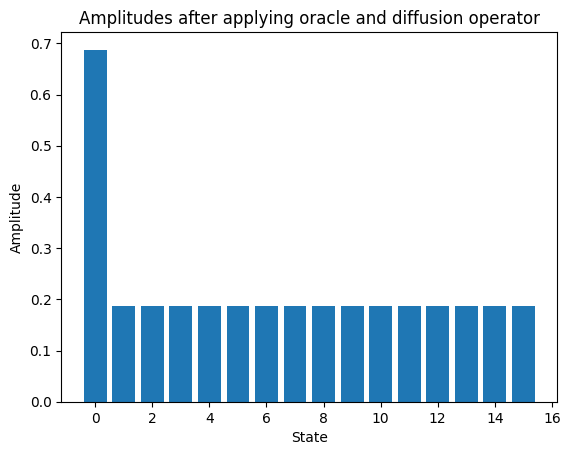

In [ ]:
import matplotlib.pyplot as plt

n_bits = 4


def diffusion_matrix():
    """Return the diffusion matrix.

    Returns:
        array[float]: The matrix representation of the diffusion operator.
    """
    # Create the identity matrix
    identity = np.identity(2**n_bits)
    # Create the uniform superposition matrix
    superposition = np.full((2**n_bits, 2**n_bits), 1 / (2**n_bits))
    # Form the diffusion matrix
    diffusion = 2 * superposition - identity
    return diffusion


@qml.qnode(dev)
def difforacle_amp(combo):
    """Apply the oracle and diffusion matrix to the uniform superposition.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[complex]: The quantum state (amplitudes) after applying the oracle
        and diffusion.
    """
    # Prepare the uniform superposition
    for i in range(n_bits):
        qml.Hadamard(wires=i)

    # Apply the oracle
    qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))

    # Apply the diffusion operator
    qml.QubitUnitary(diffusion_matrix(), wires=range(n_bits))

    return qml.state()


# Plot the amplitudes for combo = [0, 0, 0, 0]
combo = [0, 0, 0, 0]
amplitudes = difforacle_amp(combo)

plt.bar(range(len(amplitudes)), np.abs(amplitudes))
plt.xlabel("State")
plt.ylabel("Amplitude")
plt.title("Amplitudes after applying oracle and diffusion operator")
plt.show()


In [89]:
@qml.qnode(dev)
def two_difforacle_amp(combo):
    """Apply the Grover operator twice to the uniform superposition.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[complex]: The resulting quantum state.
    """
    # Prepare the uniform superposition
    for i in range(n_bits):
        qml.Hadamard(wires=i)

    # Apply the Grover operator twice
    for _ in range(2):
        # Apply the oracle
        qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
        # Apply the diffusion operator
        qml.QubitUnitary(diffusion_matrix(), wires=range(n_bits))

    return qml.state()


# Verify the amplitude for the solution state
amplitudes_after_two_iterations = two_difforacle_amp(combo)
print(amplitudes_after_two_iterations)

[0.078125+0.j 0.953125+0.j 0.078125+0.j 0.078125+0.j 0.078125+0.j
 0.078125+0.j 0.078125+0.j 0.078125+0.j 0.078125+0.j 0.078125+0.j
 0.078125+0.j 0.078125+0.j 0.078125+0.j 0.078125+0.j 0.078125+0.j
 0.078125+0.j]


## Searching with Geometry

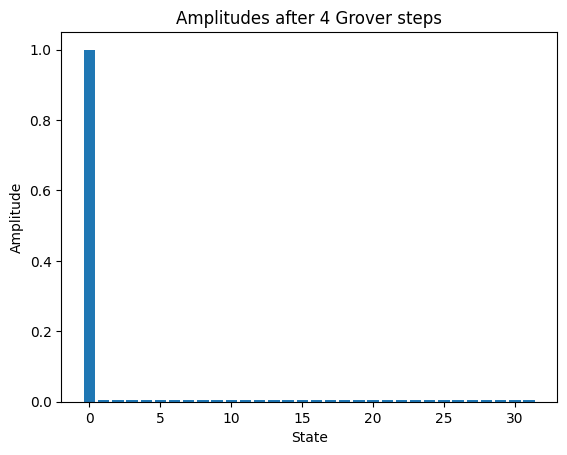

In [93]:
import matplotlib.pyplot as plt

n_bits = 5
dev = qml.device("default.qubit", wires=n_bits)


def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.

    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2] * len(combo))  # Index of solution
    my_array = np.identity(2 ** len(combo))  # Create the identity matrix
    my_array[index, index] = -1
    return my_array


def diffusion_matrix():
    """Return the diffusion matrix.

    Returns:
        array[float]: The matrix representation of the diffusion operator.
    """
    psi_piece = (1 / 2**n_bits) * np.ones((2**n_bits, 2**n_bits))
    ident_piece = np.eye(2**n_bits)
    return 2 * psi_piece - ident_piece


@qml.qnode(dev)
def grover_circuit(combo, num_steps):
    """Apply the Grover operator num_steps times to the uniform superposition
       and return the state.

    Args:
        combo (list[int]): A list of bits representing the secret combination.
        num_steps (int): The number of iterations of the Grover operator
            our circuit is to perform.

    Returns:
        array[complex]: The quantum state (amplitudes) after repeated Grover
        iterations.
    """
    # Prepare the uniform superposition
    for i in range(n_bits):
        qml.Hadamard(wires=i)

    # Apply the Grover operator num_steps times
    for _ in range(num_steps):
        # Apply the oracle
        qml.QubitUnitary(oracle_matrix(combo), wires=range(n_bits))
        # Apply the diffusion operator
        qml.QubitUnitary(diffusion_matrix(), wires=range(n_bits))

    return qml.state()


combo = [0, 0, 0, 0, 0]
my_steps = 4  # Set the number of Grover steps

# Run the Grover circuit
amplitudes = grover_circuit(combo, my_steps)

# Plot the amplitudes
plt.bar(range(len(amplitudes)), np.abs(amplitudes))
plt.xlabel("State")
plt.ylabel("Amplitude")
plt.title(f"Amplitudes after {my_steps} Grover steps")
plt.show()

## Searching with Circuits

In [94]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register + aux
dev = qml.device("default.qubit", wires=all_wires)


def oracle(combo):
    """Implement an oracle using a multi-controlled X gate.

    Args:
        combo (list): A list of bits representing the secret combination.
    """
    combo_str = "".join(str(j) for j in combo)
    qml.MultiControlledX(control_wires=query_register, wires=aux, control_values=combo_str)


In [95]:
def hadamard_transform(my_wires):
    """Apply the Hadamard transform on a given set of wires.

    Args:
        my_wires (list[int]): A list of wires on which the Hadamard transform will act.
    """
    for wire in my_wires:
        qml.Hadamard(wires=wire)


def diffusion():
    """Implement the diffusion operator using the Hadamard transform and
    multi-controlled X."""
    hadamard_transform(query_register)
    qml.MultiControlledX(control_wires=query_register, wires=aux, control_values="0" * len(query_register))
    hadamard_transform(query_register)


In [96]:
@qml.qnode(dev)
def grover_circuit(combo):
    """Apply the MultiControlledX Grover operator and return probabilities on
    query register.

    Args:
        combo (list[int]): A list of bits representing the secret combination.

    Returns:
        array[float]: Measurement outcome probabilities.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE QUERY AND AUXILIARY SYSTEM
    hadamard_transform(query_register)
    qml.PauliX(wires=aux)
    qml.Hadamard(wires=aux)

    # APPLY GROVER ITERATION
    oracle(combo)
    diffusion()

    return qml.probs(wires=query_register)

## Steps and Speedups

In [97]:
def grover_iter(combo, num_steps):
    """Run Grover search for a given secret combination and a number of iterations.

    Args:
        combo (list[int]): The secret combination, represented as a list of bits.
        num_steps (int): The number of Grover iterations to perform.

    Returns:
        array[float]: Probability for observing different outcomes.
    """
    n_bits = len(combo)
    query_register = list(range(n_bits))
    aux = [n_bits]
    all_wires = query_register + aux
    dev = qml.device("default.qubit", wires=all_wires)

    @qml.qnode(dev)
    def inner_circuit():
        # Prepare the query and auxiliary system
        hadamard_transform(query_register)
        qml.PauliX(wires=aux)
        qml.Hadamard(wires=aux)

        # Apply Grover iterations
        for _ in range(num_steps):
            oracle(combo)
            diffusion(n_bits)

        return qml.probs(wires=query_register)

    return inner_circuit()


In [ ]:
def local_max_arg(num_list):
    """Find the index of the first local maximum in a list of numbers.

    Args:
        num_list (list[float]): A list of numbers.

    Returns:
        int: The index of the first local maximum (1-based index).
    """
    for i in range(1, len(num_list) - 1):
        if num_list[i] > num_list[i - 1] and num_list[i] > num_list[i + 1]:
            return i + 1
    return 1 if num_list[0] > num_list[1] else len(num_list)


n_list = range(3, 7)
opt_steps = []

for n_bits in n_list:
    combo = [0] * n_bits  # A simple combination
    step_list = range(1, 10)  # Try out some large number of steps
    max_probs = []

    for steps in step_list:
        probs = grover_iter(combo, steps)
        max_probs.append(max(probs))

    opt_steps.append(local_max_arg(max_probs))

print("The optimal number of Grover steps for qubits in", list(n_list), "is", opt_steps, ".")


In [107]:
import numpy as np

grad = 0.5
intercept = -0.47
# SUBMIT TO PLOT GRAPH

## Multiple solutions

In [109]:
n_bits = 5
query_register = list(range(n_bits))
aux = [n_bits]
all_wires = query_register + aux
dev = qml.device("default.qubit", wires=all_wires)


def oracle_multi(combos):
    """Implement multi-solution oracle using sequence of multi-controlled X gates.

    Args:
        combos (list[list[int]]): A list of solutions.
    """
    for combo in combos:
        combo_str = "".join(str(j) for j in combo)
        ##################
        # YOUR CODE HERE #
        ##################
        qml.MultiControlledX(control_wires=query_register, wires=aux, control_values=combo_str)

In [110]:
def grover_iter_multi(combos, num_steps):
    """Run Grover search for multiple secret combinations and a number
    of Grover steps.

    Args:
        combos (list[list[int]]): The secret combination, represented as a list of bits.
        num_steps (int): The number of Grover iterations to perform.

    Returns:
        array[float]: Probability for observing different outcomes.
    """

    @qml.qnode(dev)
    def inner_circuit():
        qml.PauliX(wires=n_bits)
        qml.Hadamard(wires=n_bits)
        hadamard_transform(query_register)

        for _ in range(num_steps):
            oracle_multi(combos)
            diffusion(n_bits)
        return qml.probs(wires=query_register)

    return inner_circuit()


In [ ]:
m_list = range(3)
opt_steps = []

for m_bits in m_list:
    combos = [[int(s) for s in np.binary_repr(j, n_bits)] for j in range(2**m_bits)]
    step_list = range(1, 10)

    max_probs = []
    for steps in step_list:
        probs = grover_iter_multi(combos, steps)
        max_probs.append(max(probs))

    opt_steps.append(local_max_arg(max_probs))

print("The optimal number of Grover steps for the number of solutions in", [1, 2, 4], "is", opt_steps, ".")


In [111]:
grad = -0.5
intercept = 2.03
# SUBMIT TO PLOT GRAPH